In [76]:
import pandas as pd
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
import descartes
import numpy as np
import seaborn as sns
import re

In [33]:
data = pd.read_csv("properatti.csv", sep = ",")

In [34]:
data_1=data.drop(columns=['image_thumbnail','properati_url','lat-lon','Unnamed: 0','expenses','price_aprox_local_currency'])

In [35]:
(data_1.isnull().sum()/data_1.shape[0])*100

operation                   0.000000
property_type               0.000000
place_name                  0.018974
place_with_parent_names     0.000000
country_name                0.000000
state_name                  0.000000
geonames_id                15.440521
lat                        42.525986
lon                        42.525986
price                      16.837156
currency                   16.837981
price_aprox_usd            16.837156
surface_total_in_m2        32.443491
surface_covered_in_m2      16.422208
price_usd_per_m2           43.394654
price_per_m2               27.686850
floor                      93.483749
rooms                      60.905791
description                 0.001650
title                       0.000000
dtype: float64

In [36]:
data_1.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO


<AxesSubplot:>

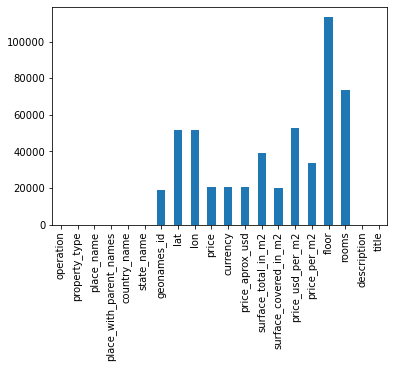

In [37]:
# number of nulls for each column
vc_nulls = data_1.apply(lambda x: x.isnull().value_counts()).T[True]
vc_nulls.hist() # if you want a histogram of these counts
# or if you wanted to plot the null count of each column as a bar
vc_nulls.plot(kind = 'bar')

### Filtramos monedas

In [38]:
monedas=data_1['currency'].unique()
monedas

array(['USD', nan, 'ARS', 'PEN', 'UYU'], dtype=object)

In [39]:
data_1['currency'].value_counts()

USD    87587
ARS    13219
PEN        2
UYU        1
Name: currency, dtype: int64

In [40]:
mask1=data['currency']=='UYU'
data_1[mask1]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
107390,sell,house,San Roque,|Argentina|Mendoza|San Roque|,Argentina,Mendoza,3836586.0,NaN,NaN,650000000.0,UYU,22980378.29,NaN,NaN,NaN,NaN,NaN,NaN,"Casa con Calefacción central, Mendoza, San Roq...",Casa - San Vicente


In [41]:
mask2=data['currency']=='PEN'
data_1[mask2]

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
50387,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,380000.0,PEN,117139.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 55:PREVENTA ::: OPORTUNIDAD ::: Dúplex a...,DUPLEX A LA VENTA | Liniers 1200 | Tandil
50388,sell,apartment,Capital Federal,|Argentina|Capital Federal|,Argentina,Capital Federal,3433955.0,NaN,NaN,950000.0,PEN,292848.33,NaN,NaN,NaN,NaN,NaN,NaN,Ref.: 56Duplex en venta de 1 dormitorio con ap...,DUPLEX A LA VENTA | Liniers 1200 | Tandil


In [42]:
data_2=data_1.drop(index=[107390,50387,50388])

data_2['currency'].unique()

array(['USD', nan, 'ARS'], dtype=object)

In [43]:
data_2.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...


Entonces hay que usar la columna 'price_aprox_usd'

In [44]:
maskarg=data_2['currency']=='ARS'

In [45]:
data_2[maskarg]['price_aprox_usd'].isnull().sum()

0

### Borremos los datos duplicados para eso saquemos los que tengan igual lon, lat y descripción.

In [46]:
data_2_nodup = data_2.drop_duplicates(subset = ['description',"lat", "lon"], keep = "first")

In [47]:
data_2_nodup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106385 entries, 0 to 121219
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   operation                106385 non-null  object 
 1   property_type            106385 non-null  object 
 2   place_name               106362 non-null  object 
 3   place_with_parent_names  106385 non-null  object 
 4   country_name             106385 non-null  object 
 5   state_name               106385 non-null  object 
 6   geonames_id              89413 non-null   float64
 7   lat                      64074 non-null   float64
 8   lon                      64074 non-null   float64
 9   price                    90165 non-null   float64
 10  currency                 90164 non-null   object 
 11  price_aprox_usd          90165 non-null   float64
 12  surface_total_in_m2      69739 non-null   float64
 13  surface_covered_in_m2    88644 non-null   float64
 14  pric

In [48]:
data_2_nodup.head(5)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,USD,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,USD,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,USD,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,sell,PH,Liniers,|Argentina|Capital Federal|Liniers|,Argentina,Capital Federal,3431333.0,-34.647797,-58.516424,95000.0,USD,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,sell,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Argentina,Buenos Aires Costa Atlántica,3435548.0,-38.002626,-57.549447,64000.0,USD,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


### Analicemos outliers de la columna 'price_aprox_usd'

In [23]:
describe_price_aprox_usd = data_2_nodup["price_aprox_usd"].describe()
describe_price_aprox_usd

count    9.016500e+04
mean     2.453305e+05
std      3.946432e+05
min      0.000000e+00
25%      9.000000e+04
50%      1.500000e+05
75%      2.750000e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

In [24]:
q1 = describe_price_aprox_usd.quantile(0.25)
print(q1)
q2 = describe_price_aprox_usd.quantile(0.5)
print(q2)
q3 = describe_price_aprox_usd.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = describe_price_aprox_usd > up_threshold
outlier_mask_down = describe_price_aprox_usd < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_aprox_usd[outlier_mask]

90123.75
197665.27362274716
304910.7888335794
627091.3470839486
-232056.8082503691


In [25]:
describe_price_aprox_usd_filtered = describe_price_aprox_usd[not_outliers]
describe_price_aprox_usd_filtered.describe()

count         7.000000
mean     177876.957511
std      134662.256896
min           0.000000
25%       90082.500000
50%      150000.000000
75%      260165.273623
max      394643.155334
Name: price_aprox_usd, dtype: float64

In [26]:
describe_price_aprox_usd.describe()

count    8.000000e+00
mean     5.973823e+06
std      1.639388e+07
min      0.000000e+00
25%      9.012375e+04
50%      1.976653e+05
75%      3.049108e+05
max      4.654544e+07
Name: price_aprox_usd, dtype: float64

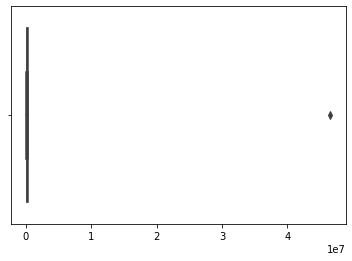

In [27]:
sns.boxplot(x=describe_price_aprox_usd.values);

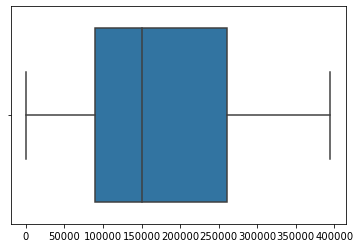

In [28]:
sns.boxplot(x=describe_price_aprox_usd_filtered.values);

# Imputar price usd per m2

In [51]:
data_2_nodup['price_usd_per_m2_clean'] = data_2_nodup['price_usd_per_m2']
mask1 = data_2_nodup['price_usd_per_m2_clean'].isnull()

(data_2_nodup.loc[mask1, 'price_usd_per_m2_clean']).isnull().sum()

data_2_nodup.loc[mask1, 'price_usd_per_m2_clean'] = (data_2_nodup.loc[mask1, 'price']/data_2_nodup.loc[mask1, 'surface_covered_in_m2'])

data_2_nodup.loc[:, 'price_usd_per_m2_clean'].isnull().sum()/data_2_nodup.shape[0]

/Users/tobiascanavesi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


0.2225407717253372

### Analicemos outliers de la columna 'price_usd_per_m2_clean'

In [70]:
describe_price_usd_per_m2_clean = data_2_nodup["price_usd_per_m2_clean"].describe()
describe_price_usd_per_m2_clean

count    8.271000e+04
mean     3.558534e+03
std      2.620394e+04
min      6.000000e-01
25%      1.222222e+03
50%      1.800000e+03
75%      2.521186e+03
max      4.000000e+06
Name: price_usd_per_m2_clean, dtype: float64

In [71]:
q1 = describe_price_usd_per_m2_clean.quantile(0.25)
print(q1)
q2 = describe_price_usd_per_m2_clean.quantile(0.5)
print(q2)
q3 = describe_price_usd_per_m2_clean.quantile(0.75)
print(q3)


iqr = (q3 - q1) * 1.5

up_threshold = q3 + iqr
low_threshold = q1 - iqr

print(up_threshold)
print(low_threshold)

outlier_mask_up = describe_price_usd_per_m2_clean > up_threshold
outlier_mask_down = describe_price_usd_per_m2_clean < low_threshold
outlier_mask = np.logical_or(outlier_mask_up, outlier_mask_down)
not_outliers = np.logical_not(outlier_mask)

outliers = describe_price_usd_per_m2_clean[outlier_mask]

1655.5555555555557
3039.860037121759
40330.45601529971
98342.80670491594
-56356.795134060674


In [72]:
describe_price_usd_per_m2_clean_filtered = describe_price_usd_per_m2_clean[not_outliers]
describe_price_usd_per_m2_clean_filtered.describe()

count        7.000000
mean     16859.497664
std      30445.704082
min          0.600000
25%       1511.111111
50%       2521.186441
75%      14881.237494
max      82710.000000
Name: price_usd_per_m2_clean, dtype: float64

In [63]:
describe_price_usd_per_m2_clean.describe()

count    8.000000e+00
mean     5.147521e+05
std      1.408535e+06
min      6.000000e-01
25%      1.655556e+03
50%      3.039860e+03
75%      4.033046e+04
max      4.000000e+06
Name: price_usd_per_m2_clean, dtype: float64

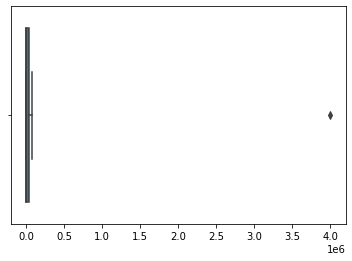

In [66]:
sns.boxplot(x=describe_price_usd_per_m2_clean.values);

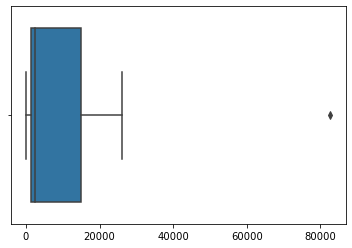

In [67]:
sns.boxplot(x=describe_price_usd_per_m2_clean_filtered.values);

In [69]:
describe_price_usd_per_m2_clean_filtered

count    82710.000000
mean      3558.533634
std      26203.941354
min          0.600000
25%       1222.222222
50%       1800.000000
75%       2521.186441
Name: price_usd_per_m2_clean, dtype: float64

# Limpieza con regex

In [74]:
data_2_nodup['description'][1]

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [77]:
pileta_pattern = "pileta|picina|pisina|piscina"
pileta_regex = re.compile(pileta_pattern, re.I)
pileta_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else pileta_regex.search(x))
pileta_mask = pileta_matches.notnull()
pileta_description = pileta_matches.loc[pileta_mask]

In [78]:
pileta_description

7         <re.Match object; span=(101, 107), match='PILE...
8         <re.Match object; span=(101, 107), match='PILE...
13        <re.Match object; span=(100, 107), match='Pisc...
14        <re.Match object; span=(75, 82), match='Piscina'>
18        <re.Match object; span=(418, 425), match='Pisc...
                                ...                        
121155    <re.Match object; span=(260, 266), match='pile...
121211    <re.Match object; span=(451, 457), match='pile...
121212    <re.Match object; span=(594, 600), match='pile...
121213    <re.Match object; span=(264, 270), match='pile...
121215    <re.Match object; span=(287, 293), match='pile...
Name: description, Length: 28336, dtype: object

In [83]:
pileta_description.iloc[2].string

' Torre I Mondrian. 3 ambientes con terraza y dos baños al frente.Vitraux ofrece en el ultimo nivel, Piscina con Solarium, un espacio con Sala de Reunión para uso profesional, eventos o proyecciones con un amplio Foyer, Sauna, Gimnasio, un Salón de Usos Múltiples con cocina y una amplia expansión. Asimismo cuenta con un Hall en Doble altura y un amplio Estar que balconea al mismo en el primer piso.Así destaca la Excelente Relación de espacios de uso común sobre el metro propio, sobre todo en Studios que rondan los 30 metros propios y pueden gozar de todos los diferentes usos especiales.'

In [80]:
pileta_mask

0         False
1         False
2         False
3         False
4         False
          ...  
121214    False
121215     True
121217    False
121218    False
121219    False
Name: description, Length: 106385, dtype: bool

In [81]:
description_to_replace = [x.string for x in pileta_description]
print(len(description_to_replace))
description_to_replace_unique = list(set(description_to_replace))
print(len(description_to_replace_unique))

28336
27893


In [85]:
data_2_nodup['pileta']=''

/Users/tobiascanavesi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
data_2_nodup['cochera']=''

/Users/tobiascanavesi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [87]:
data_2_nodup.loc[pileta_mask, 'pileta'] =1


/Users/tobiascanavesi/opt/anaconda3/envs/branch-env/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [90]:
data_2_nodup.head(1)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.0,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,


In [91]:
cochera_pattern = "cochera|garage"
cochera_regex = re.compile(cochera_pattern, re.I)
cochera_matches = data_2_nodup['description'].apply(lambda x: x if x is np.NaN else cochera_regex.search(x))
cochera_mask = cochera_matches.notnull()
cochera_description = cochera_matches.loc[cochera_mask]

In [92]:
cochera_description.iloc[0].string

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

In [93]:
description_to_replace_cochera= [x.string for x in cochera_description]
print(len(description_to_replace_cochera))
description_to_replace_unique_cochera = list(set(description_to_replace_cochera))
print(len(description_to_replace_unique_cochera))

43859
43286


In [94]:
data_2_nodup.loc[cochera_mask, 'cochera'] = 1

/Users/tobiascanavesi/opt/anaconda3/envs/branch-env/lib/python3.7/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [96]:
data_2_nodup.head(3)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,40.0,1127.272727,1550.000000,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1
2,sell,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.652262,-58.522982,72000.0,...,55.0,1309.090909,1309.090909,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,,


### regex ambientes

In [100]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
description = data_2_nodup['description'].astype(str)
resultado_ambientes = description.apply(lambda x: regex_ambientes.search(x))
ambientes_match = resultado_ambientes.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match.value_counts

<bound method IndexOpsMixin.value_counts of 0                   2 AMBIENTES 
1                           None
2                  2 AMBIENTES 3
3                   3 ambientes 
4                           None
                   ...          
121214                      None
121215                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: description, Length: 106385, dtype: object>

In [105]:
pattern_ambientes = "(?P<ambiente>\w+?\s(amb|AMB|Ambiente|ambiente|AMBIENTE|Ambientes|ambientes|AMBIENTES|MONOAMBIENTE)\s\d?)"
regex_ambientes = re.compile(pattern_ambientes)
title = data_2_nodup['title'].astype(str)
resultado_ambientes2 = title.apply(lambda x: regex_ambientes.search(x))
ambientes_match2 = resultado_ambientes2.apply(lambda x: x if x is None else x.group('ambiente'))
ambientes_match2.value_counts

<bound method IndexOpsMixin.value_counts of 0                         2 AMB 
1                           None
2                        2 AMB 3
3                           None
4                         2 AMB 
                   ...          
121214                      None
121215                      None
121217    DEPARTAMENTO AMBIENTE 
121218                      None
121219                      None
Name: title, Length: 106385, dtype: object>

In [103]:
ambientes_match.head(10)

0               2 AMBIENTES 
1                       None
2              2 AMBIENTES 3
3               3 ambientes 
4                       None
5                       None
6                       None
7    EXCELENTE MONOAMBIENTE 
8             DOS AMBIENTES 
9                       None
Name: description, dtype: object

In [106]:
data_2_nodup['ambientes'] = ambientes_match
data_2_nodup['ambientes2'] = ambientes_match2

/Users/tobiascanavesi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/tobiascanavesi/.local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [107]:
data_ambientes = data_2_nodup.loc[:, 'ambientes': 'ambientes2'].astype(str)
data_ambientes

,ambientes,ambientes2
0,2 AMBIENTES,2 AMB
1,None,None
2,2 AMBIENTES 3,2 AMB 3
3,3 ambientes,None
4,None,2 AMB
...,...,...
121214,None,None
121215,None,None
121217,DEPARTAMENTO AMBIENTE,DEPARTAMENTO AMBIENTE
121218,None,None


In [108]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb = data_ambientes['ambientes'].apply(lambda x: regex_nro_ambientes.search(x))
# [('ambientes', 'ambientes2')]
nro_amb_match = resultado_nro_amb.apply(lambda x: x if x is None else x.group('nro_ambientes'))


0            2
1         None
2            2
3            3
4         None
          ... 
121214    None
121215    None
121217    None
121218    None
121219    None
Name: ambientes, Length: 106385, dtype: object

In [110]:
pattern_nro_ambientes = "(?P<nro_ambientes>\d)"
regex_nro_ambientes = re.compile(pattern_nro_ambientes)

resultado_nro_amb2 = data_ambientes['ambientes2'].apply(lambda x: regex_nro_ambientes.search(x))

nro_amb_match2 = resultado_nro_amb2.apply(lambda x: x if x is None else x.group('nro_ambientes'))

nro_amb_match2

0            2
1         None
2            2
3         None
4            2
          ... 
121214    None
121215    None
121217    None
121218    None
121219    None
Name: ambientes2, Length: 106385, dtype: object

In [111]:
df_amb = pd.DataFrame([nro_amb_match, nro_amb_match2])
df_ambientes = df_amb.T
df_ambientes

,ambientes,ambientes2
0,2,2
1,None,None
2,2,2
3,3,None
4,None,2
...,...,...
121214,None,None
121215,None,None
121217,None,None
121218,None,None


In [122]:
df_ambientes.apply(lambda x: x['ambientes'] if x['ambientes']!= None else x['ambientes2'],axis=1)

0            2
1         None
2            2
3            3
4            2
          ... 
121214    None
121215    None
121217    None
121218    None
121219    None
Length: 106385, dtype: object

Nos queda meterlo en el dataset final

# Geo analysis
    

In [123]:
geo_prop=data_2_nodup[['lon','lat','geonames_id']].copy()
geo_prop.head()

,lon,lat,geonames_id
0,-58.508839,-34.661824,3430787.0
1,-57.964330,-34.903883,3432039.0
2,-58.522982,-34.652262,3430787.0
3,-58.516424,-34.647797,3431333.0
4,-57.549447,-38.002626,3435548.0


In [136]:
from shapely.geometry import Point


In [141]:
geo_prop = gpd.points_from_xy(data_2_nodup.lon, data_2_nodup.lat)
dptos = gpd.GeoDataFrame(data_2_nodup, geometry=geo_prop)

In [138]:
data_2_nodup=data_2_nodup.drop(index=[28512])
data_2_nodup=data_2_nodup.drop(index=[9761])

KeyError: '[28512] not found in axis'

In [145]:
dptos.head(2)

,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat,lon,price,...,floor,rooms,description,title,price_usd_per_m2_clean,pileta,cochera,ambientes,ambientes2,geometry
0,sell,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Argentina,Capital Federal,3430787.0,-34.661824,-58.508839,62000.0,...,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1127.272727,,,2 AMBIENTES,2 AMB,POINT (-58.50884 -34.66182)
1,sell,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Argentina,Bs.As. G.B.A. Zona Sur,3432039.0,-34.903883,-57.964330,150000.0,...,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,,1,None,None,POINT (-57.96433 -34.90388)


In [148]:
import contextily  as cx

In [132]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

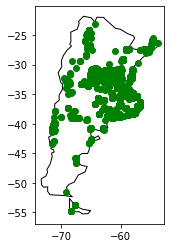

In [142]:
ax = world[world.name == 'Argentina'].plot(color='White', edgecolor='black')
dptos.plot(ax=ax, color='green')
plt.show()

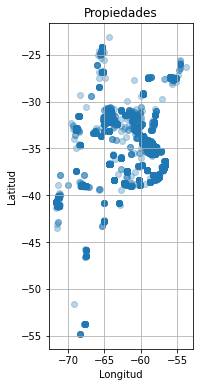

In [149]:
# Muestra los pozos en un gráfico con latitud y longitud
fig, ax = plt.subplots(figsize=(4,6))
ax.set_title('Propiedades')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid()

dptos.plot(ax=ax,
               legend = True,
               alpha=0.3)
plt.show()


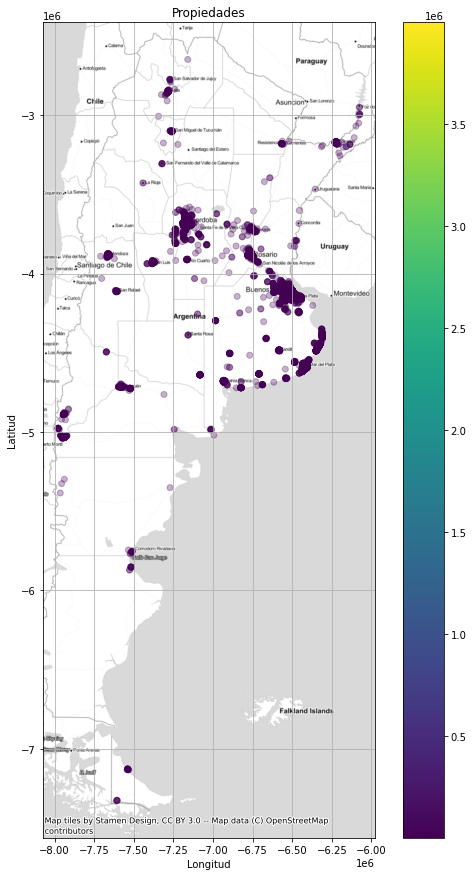

In [159]:
fig, ax = plt.subplots(figsize=(10,15))
ax.set_title('Propiedades')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
plt.grid()

dptos.crs = "EPSG:4326"                        
dptos_3857 = dptos.to_crs(epsg=3857)       
dptos_3857.plot(column='price_usd_per_m2_clean',ax=ax,legend = True,alpha=0.3)

cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite) 